In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import time

#Marks the starting period
start_time = time.time()

In [2]:
# fasta_content="D:\Repo\A_Universal_Framework_For_Clusetering_Sequences\Datasets\Sorted_Sequences\Cpg_Dataset_Sequences_Sorted.fa"
fasta_content="D:\Repo\A_Universal_Framework_For_Clusetering_Sequences\Datasets\Sorted_Sequences\AJR_Dataset_Sequences_100k_Sorted.fa"

# Preprocessing: Extracting and encoding sequences
def parse_fasta(content):
    sequences = []
    labels = []
    max_len=0
    with open(content, 'r') as file:
        for line in file:
            if line.startswith("#"):
                label = line[-3:].strip()  # Assuming label is the last character of the line
                # label = line[-2].strip()
                labels.append(label)
            else:
                if max_len < len(line.strip()):
                    max_len=len(line.strip())

                sequences.append(line.strip())
    
    return sequences, labels,max_len

# Extract sequences from the file
sequences,labels,max_len = parse_fasta(fasta_content)

In [3]:
def one_hot_encoding(seq,max_len):
    column_dim=max_len
    row_dim=5
    encoded_vector=np.zeros((row_dim,column_dim))
    i=0
    # Encoding sequences into numerical format (A=0, T=1, C=2, G=3)
    char_to_int = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
    for i, chr in enumerate(seq):
        if chr in char_to_int:  # Check if the character is valid
            row_indx = char_to_int[chr]
            encoded_vector[row_indx][i] = 1

    return encoded_vector

encoded_sequences=[]

encoded_sequences = np.array([one_hot_encoding(seq, max_len) for seq in sequences])

In [4]:
print(encoded_sequences.shape)
print(max_len)

(100000, 5, 100)
100


In [5]:
encoded_sequences=encoded_sequences.reshape(len(encoded_sequences), -1)

print(encoded_sequences.shape)

(100000, 500)


In [6]:
# Preprocessing: Add a mapping for labels
# label_to_int = {'0': 0, '1': 1}  # Example mapping; update based on your labels
label_to_int = {'0A':1,'0T': 2,'0G': 3,'0C': 4, '1A': 5,'1T': 6,'1G': 7,'1C': 8} 
numerical_labels = [label_to_int[label] for label in labels]  # Convert labels to numerical format


In [7]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
latent_points_2d = pca.fit_transform(encoded_sequences)

In [8]:
# import seaborn as sns

# # Create the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(latent_points_2d, cmap="viridis", cbar_kws={'label': 'Probability'})
# plt.title("Heatmap of Class Probabilities")
# # plt.title("Heatmap of Cpg Island Probabilities")
# plt.xlabel("Class")
# # plt.xlabel("Cpg Island")
# plt.ylabel("Sample Index")
# plt.show()

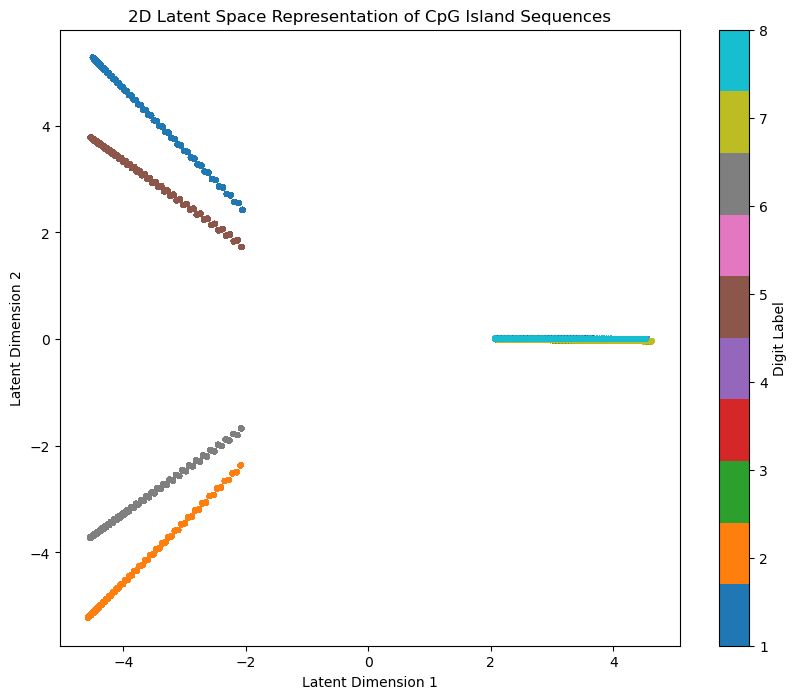

In [9]:
# Plot latent space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_points_2d[:, 0], latent_points_2d[:, 1], c=numerical_labels, cmap="tab10", s=10)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("2D Latent Space Representation of CpG Island Sequences")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

In [10]:
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 4.77918004989624 seconds
